<a href="https://colab.research.google.com/github/mauricio201922/DataScience-2/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Import data and modules
import numpy as np
import math

In [3]:
import pandas as pd
atributos = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Class']
df = pd.read_csv('/content/drive/MyDrive/iris.data.csv', delimiter=',', names=atributos)

# Definimos uma matriz "X" com as caracteristicas que representam uma flor Iris.
X = df[df.columns.difference(['Class'])].values

# E um vetor "y" com das classes de cada uma das flores.
y = df['Class'].values

In [4]:
def entropia(probabilidades):
    return sum(-p * math.log(p, 2) for p in probabilidades if p)

In [5]:
p1 = 50.0/150.0
p2 = 50.0/150.0
p3 = 50.0/150.0
print(entropia([p1, p2, p3]))

1.584962500721156


[Text(125.55000000000001, 190.26, 'X[0] <= 2.45\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(83.7, 135.9, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(167.4, 135.9, 'X[1] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(83.7, 81.53999999999999, 'X[0] <= 4.95\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(41.85, 27.180000000000007, 'entropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(125.55000000000001, 27.180000000000007, 'entropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(251.10000000000002, 81.53999999999999, 'X[0] <= 4.85\nentropy = 0.151\nsamples = 46\nvalue = [0, 1, 45]'),
 Text(209.25, 27.180000000000007, 'entropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(292.95, 27.180000000000007, 'entropy = 0.0\nsamples = 43\nvalue = [0, 0, 43]')]

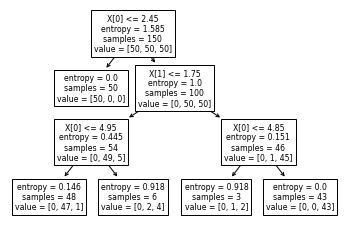

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

iris_classificador = DecisionTreeClassifier(criterion='entropy', max_depth=3)

# A função fit é usada para treinar o modelo, com base nas entradas X
# ('SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth') deve
# aprender a classificar y ('Class').
cls = iris_classificador.fit(X, y)
tree.plot_tree(cls)

### 'novos exemplos' vai receber um arrary de tamanho 3, tres subarray terá cada tamanho 4.

- a função predict do sklearnTree vai classificar as amostras da variavel novos_exemplos
- a saida trás as classes existente de cada flor iris 
---
temos 'Iris-setosa', 'Iris-versicolor' e 'Iris-virginica'

In [14]:
novos_exemplos = [[1.6, 0.5, 5.0, 3.6], [4.2, 1.2, 5.8, 2.7], [5.2, 2.4, 7.0, 3.2]]

# Função predict classificar novos exemplos de amostras.
print(iris_classificador.predict(novos_exemplos))

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


### A validação cruzada é uma forma de tentar avaliar o quanto seu modelo está conseguindo aprender a classificar os dados. A ideia é dividir o dataset em n partes iguais e para cada uma das n partes, esconde uma parte para teste e usa as demais para treino.
---
### Nesse exemplo, vou dividir o dataset em 5 partes, por tanto cada parte terá 20 amostras do dataset, então a validação cruzada vai pegar uma dessas partes com 20 amostras e guardar para usar no teste e usar 80 amostras para treinar o Decision Tree. Isso será feito 5 vezes, uma para cada parte, e no final imprime a média do resultado do teste de cada parte.

In [15]:
from sklearn.model_selection import cross_val_score
avaliacao = cross_val_score(iris_classificador, X, y, scoring='accuracy', cv=5)
print(avaliacao.mean())

0.96
